<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201/MM/MM_Assignment_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Group Members:**

#####MAIZATUL AFRINA SAFIAH BINTI SAIFUL AZWAN (A20EC0204)

######MADIHAH BINTI CHE ZABRI (A20EC0074)

# 2015 Flight Delays and Cancellations
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.



---


<h2>Name and Description</h2>
<table>
  <tr>
    <th>Columns</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>MONTH</td>
    <td>Month of the flight trip</td>
  </tr>
  <tr>
    <td>DAY</td>
    <td>Day of the flight trip</td>
  </tr>
  <tr>
    <td>DAY_OF_WEEK</td>
    <td>Day of week of the flight trip</td>
  </tr>
  <tr>
    <td>AIRLINE</td>
    <td>Airline Identifier</td>
  </tr>
  <tr>
    <td>FLIGHT_NUMBER</td>
    <td>Flight Identifier</td>
  </tr>
  <tr>
    <td>TAIL_NUMBER</td>
    <td>Aircraft Identifier</td>
  </tr>
  <tr>
    <td>ORIGIN_AIRPORT</td>
    <td>Departure Airport</td>
  </tr>
  <tr>
    <td>DESTINATION_AIRPORT</td>
    <td>Destination Airport</td>
  </tr>
  <tr>
    <td>SCHEDULED_DEPARTURE</td>
    <td>Planned departure time</td>
  </tr>
   <tr>
    <td>DEPARTURE_TIME</td>
    <td>Wheel_Off - Taxi_Out</td>
  </tr>
   <tr>
    <td>DEPARTURE_DELAY</td>
    <td>Total Delay on Departure</td>
  </tr>
   <tr>
    <td>TAXI_OUT</td>
    <td>The time duration elapsed between departure from the origin airport gate and wheels off</td>
  </tr>
   <tr>
    <td>WHEELS_OFF</td>
    <td>The time point that the aircraft's wheels leave the ground</td>
  </tr>
   <tr>
    <td>SCHEDULED_TIME</td>
    <td>Planned time amount needed for the flight trip</td>
  </tr>
   <tr>
    <td>ELAPSED_TIME</td>
    <td>Air_time + Taxi_in + Taxi_out</td>
  </tr>
   <tr>
    <td>AIR_TIME</td>
    <td>The time duration between wheels_off and wheels_on time</td>
  </tr>
   <tr>
    <td>DISTANCE</td>
    <td>Diastance between two airports</td>
  </tr>
   <tr>
    <td>WHEELS_ON</td>
    <td>The time point that the aircraft's wheels touch on the ground</td>
  </tr>
   <tr>
    <td>TAXI_IN</td>
    <td>The time duration elapsed between wheels-on and gate arrival at the destination airport</td>
  </tr>
  <tr>
    <td>SCHEDULED_ARRIVAL</td>
    <td>Planned arrival time</td>
  </tr>
  <tr>
    <td>ARRIVAL_TIME</td>
    <td>Wheels_on+Taxi_in</td>
  </tr>
  <tr>
    <td>ARRIVAL_DELAY</td>
    <td>ARRIVAL_TIME-SCHEDULED_ARRIVAL</td>
  </tr>
  <tr>
    <td>DIVERTED</td>
    <td>Aircraft landed on airport that out of schedule</td>
  </tr>
  <tr>
    <td>CANCELLED</td>
    <td>Flight Cancelled (1 = cancelled)</td>
  </tr>
  <tr>
    <td>CANCELLATION_REASON</td>
    <td>Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security</td>
  </tr>
   <tr>
    <td>AIR_SYSTEM_DELAY</td>
    <td>Delay caused by air system</td>
  </tr>
   <tr>
    <td>SECURITY_DELAY</td>
    <td>Delay caused by security</td>
  </tr>
   <tr>
    <td>AIRLINE_DELAY</td>
    <td>Delay caused by the airline</td>
  </tr>
   <tr>
    <td>LATE_AIRCRAFT_DELAY</td>
    <td>Delay caused by aircraft</td>
  </tr>
   <tr>
    <td>WEATHER_DELAY</td>
    <td>Delay caused by weather</td>
  </tr>
</table>

## Downloading the Dataset



In [1]:
# Read dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1RBCR4onQ4ZihEN7a8fpqeN8zPEoFu2vB/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('flights.csv') 

Import libraries

In [2]:
import pandas as pd
import numpy as np
import random



Read csv 

In [3]:
flight = pd.read_csv("flights.csv")
pd.set_option('display.max_columns', None)
flight.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flight.tail(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,14.0,15.0,14.0,28.0,221.0,208.0,189.0,1576,437.0,5.0,440,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has been downloaded and extracted.

## Data Preparation and Cleaning




Display data types of each data

In [5]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
flight['DAY_OF_WEEK'].unique()

array([4, 5, 6, 7, 1, 2, 3])

In [6]:
flight['YEAR'].unique()

array([2015])

Drop column 'Year' since this whole dataset is referring to situation in 2015

In [7]:
flight.drop(axis=1, labels='YEAR', inplace=True)

In [8]:
flight

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Find out the amount of null in this dataset

In [9]:
flight.isnull().sum()

MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

Replace all nulls with 0

In [10]:
flight[['TAIL_NUMBER','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']] = flight[['TAIL_NUMBER','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].fillna('0')
flight

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,0,0,0,0,0,0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,0,0,0,0,0,0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,0,0,0,0,0,0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,0,0,0,0,0,0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,0,0,0,0,0,0
5819075,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,0,0,0,0,0,0
5819076,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,0,0,0,0,0,0
5819077,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,0,0,0,0,0,0


Ensure there is no null in the dataset

In [11]:
flight.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

## Exploratory Analysis and Visualization


In [14]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.6 MB/s eta 0:00:00


In [15]:
from kaleido.scopes.plotly import PlotlyScope
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Boxplot

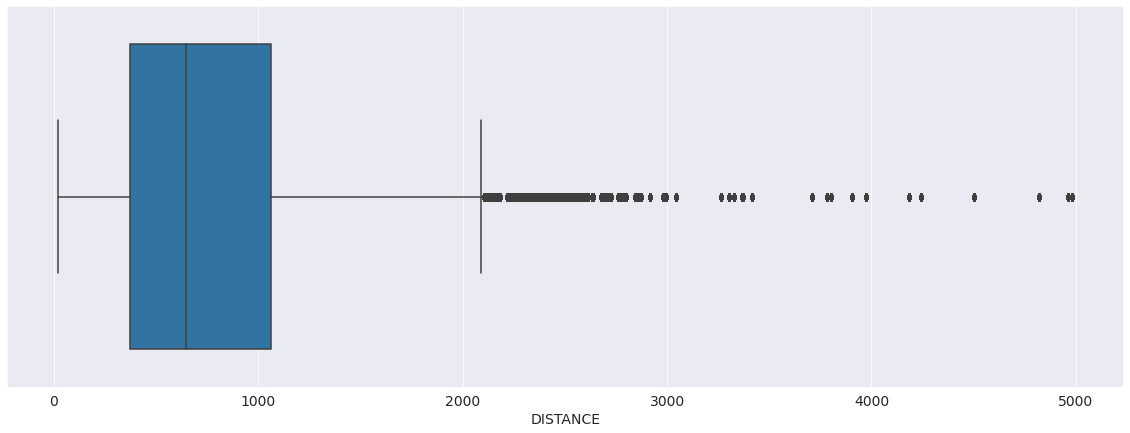

In [35]:
sns.boxplot(x = flight['DISTANCE'])

Area Plot

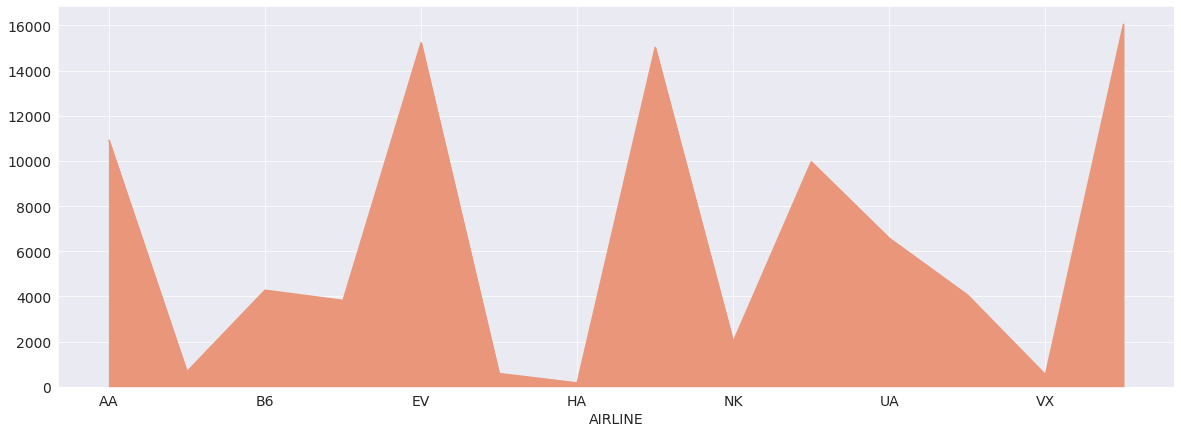

In [28]:
area = flight.groupby('AIRLINE')['CANCELLED'].sum() 
area.plot.area(color = "darksalmon")

Describe Statistics

In [29]:
flight.describe()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
count,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06
mean,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,8.223565e+02,1.493808e+03,2.609863e-03,1.544643e-02
std,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,6.077843e+02,5.071647e+02,5.102012e-02,1.233201e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,3.730000e+02,1.110000e+03,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,6.470000e+02,1.520000e+03,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.062000e+03,1.918000e+03,0.000000e+00,0.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,4.983000e+03,2.400000e+03,1.000000e+00,1.000000e+00


Histogram

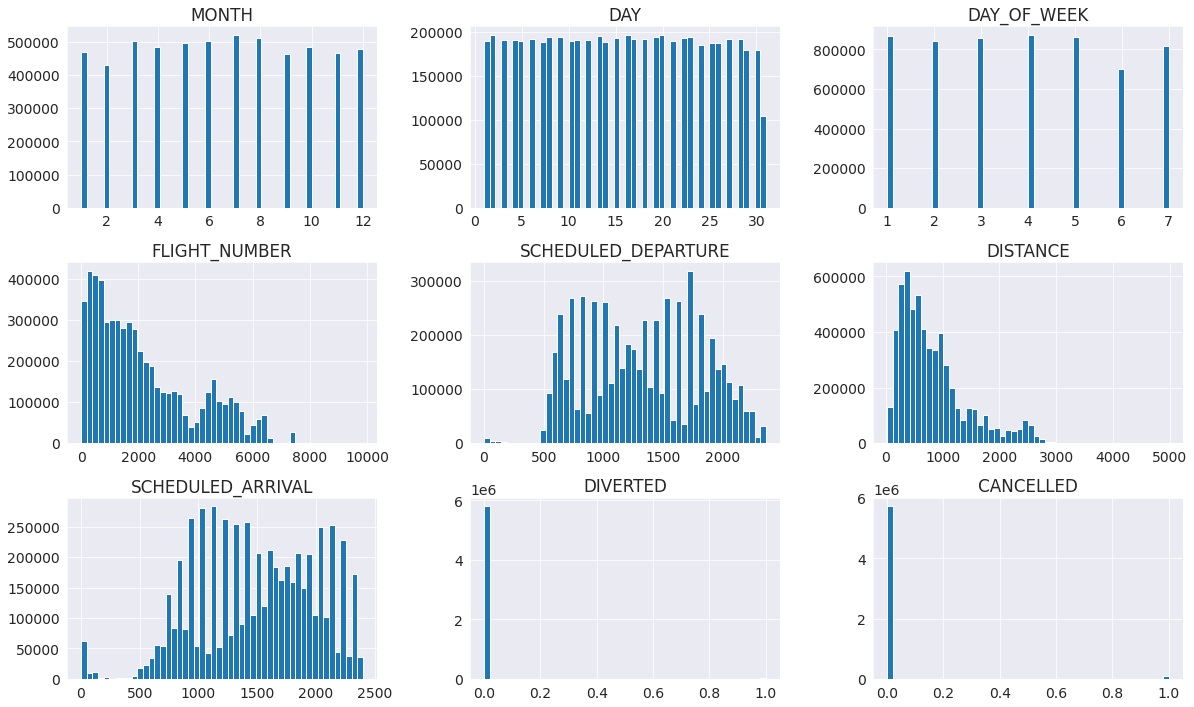

In [31]:
flight.hist(bins=50, figsize=(20,12))
plt.show()

Heat Map

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
MONTH,1.000000,0.008874,-0.007847,-0.020746,0.000207,0.011437,-0.010121,-0.000991,-0.055043
DAY,0.008874,1.000000,0.001111,0.001855,-0.001647,0.003529,-0.003688,0.001981,-0.003537
DAY_OF_WEEK,-0.007847,0.001111,1.000000,0.014461,0.008007,0.016516,0.007092,-0.001442,-0.022230
FLIGHT_NUMBER,-0.020746,0.001855,0.014461,1.000000,-0.005485,-0.331280,-0.013947,0.003802,0.037895
SCHEDULED_DEPARTURE,0.000207,-0.001647,0.008007,-0.005485,1.000000,-0.009572,0.706237,-0.000752,0.011752
DISTANCE,0.011437,0.003529,0.016516,-0.331280,-0.009572,1.000000,0.027369,0.012896,-0.032853
SCHEDULED_ARRIVAL,-0.010121,-0.003688,0.007092,-0.013947,0.706237,0.027369,1.000000,0.004820,0.007763
DIVERTED,-0.000991,0.001981,-0.001442,0.003802,-0.000752,0.012896,0.004820,1.000000,-0.006407
CANCELLED,-0.055043,-0.003537,-0.022230,0.037895,0.011752,-0.032853,0.007763,-0.006407,1.000000


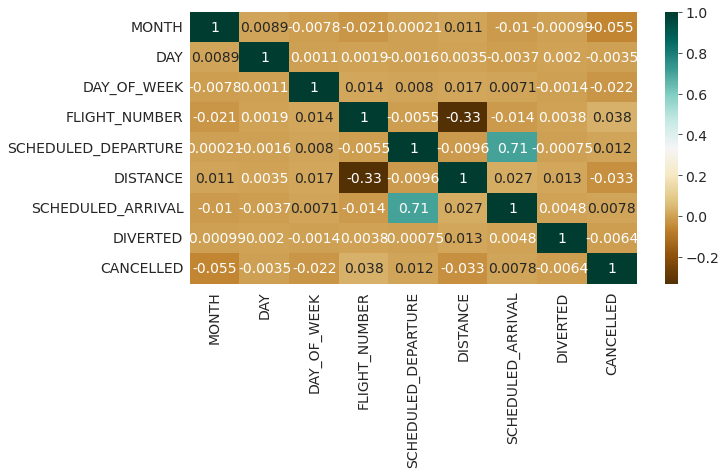

In [30]:
plt.figure(figsize=(10,5))
heatmap = flight.corr()
sns.heatmap(heatmap,cmap="BrBG",annot=True)
heatmap

## **Asking and Answering Questions**

#### **Question 1:** Which day in a week has the highest diverted flight?





In [12]:
flight['DIVERTED'].unique()

array([0, 1])

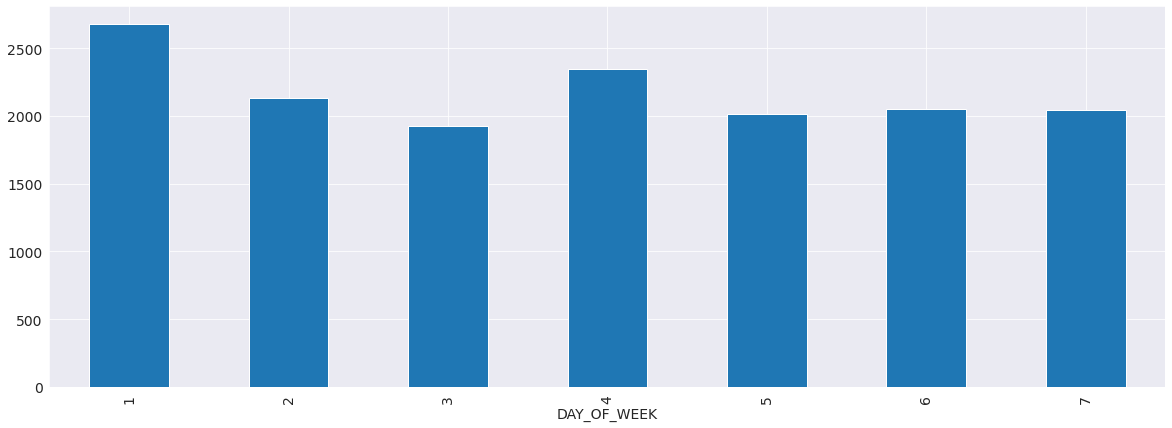

In [16]:
flight_divert = flight.groupby(flight['DAY_OF_WEEK'])['DIVERTED'].sum()
flight_divert.plot(kind = 'bar')


Bar graph above shows the first day in a week which is Monday has the highest amount of flights diverted which were 2500 amount of times and above.

**Diverted:** Most diversions occur for three main reasons: bad weather at the destination airport, technical problems with the aircraft or issues with passengers

#### Question 2: Which month has the highest frequency of flight movement?

Text(0.5, 1.0, 'TOTAL FLIGHT PER MONTH')

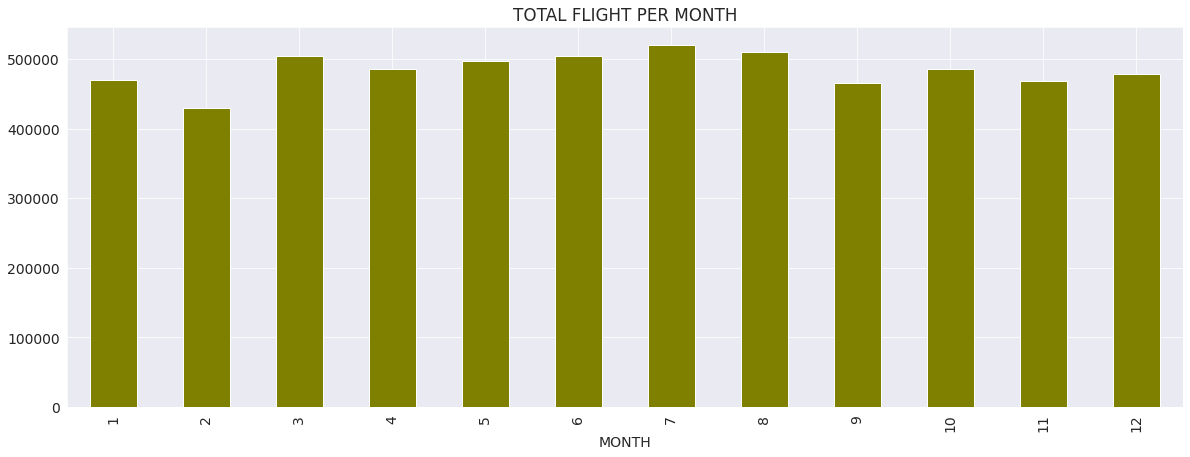

In [18]:
flightPerMonth = flight.groupby('MONTH')['FLIGHT_NUMBER'].count()
flightPerMonth.plot(kind = 'bar', color='olive')

plt.title("TOTAL FLIGHT PER MONTH")

Based on chart above, the seventh month, July has the highest frequency of flight movement which were exceeding 500,000 times.

#### **Question 3:** Which airline has highest arrival delay?



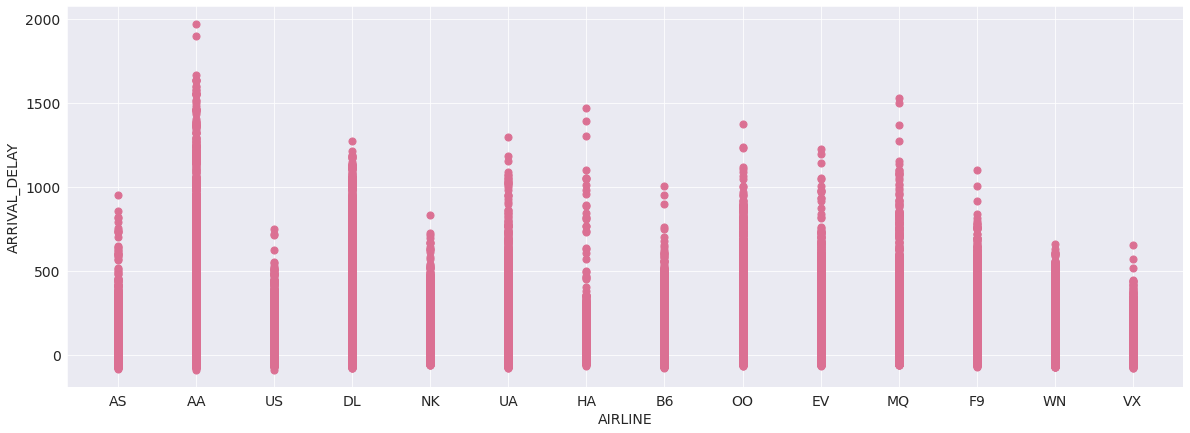

In [19]:
flight.plot.scatter(x = 'AIRLINE', y = 'ARRIVAL_DELAY', s = 50, color = 'palevioletred')

Baed on scatter plot above, the airline that experinenced the highest arrival delay is AA. 

#### Question 4: What is the maximum distance in 2015?



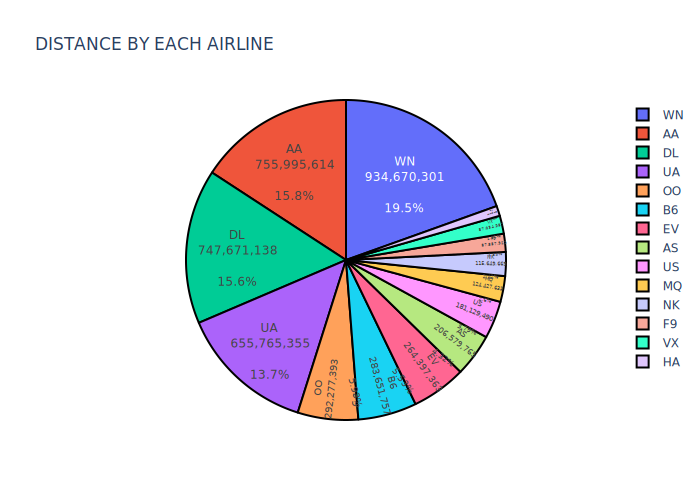

In [20]:
fig = px.pie(flight, values="DISTANCE", names="AIRLINE", hover_name="AIRLINE", labels={'AIRLINE':'DISTANCE'}, title="DISTANCE BY EACH AIRLINE")
fig.update_traces(textposition='inside', textinfo='percent+label+value',marker=dict(line=dict(color='#000000', width=2)))

fig.show("svg", engine="kaleido")

Based on the pie chart above, it show the maximum distance by each airline in 2015. 

#### Question 5: How many flight  cancelled in 2015?

In [13]:
flight['CANCELLED'].sum()

89884

Text(0.5, 1.0, 'TOTAL FLIGHT CANCELLED')

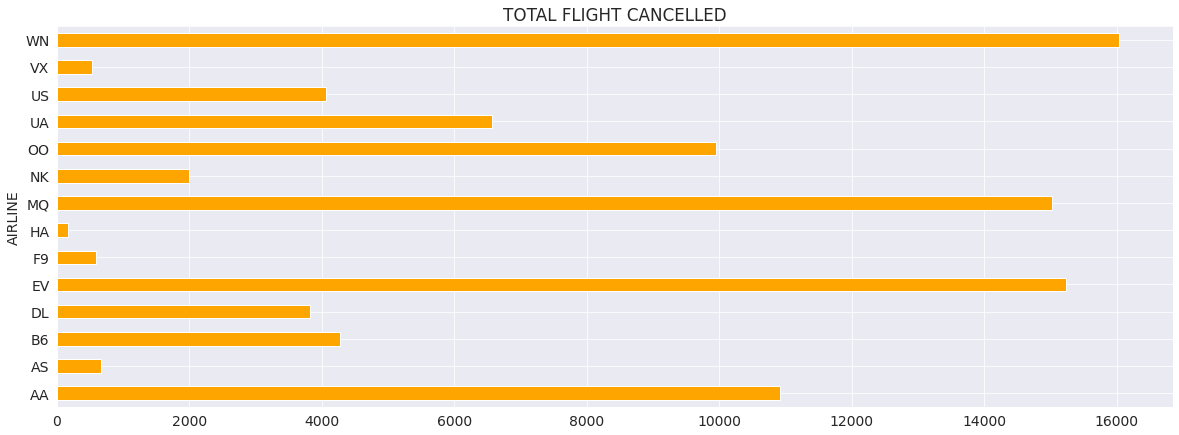

In [21]:
flight_cancel = flight.groupby('AIRLINE')['CANCELLED'].sum()
flight_cancel.plot(kind = 'barh', color='orange')

plt.title("TOTAL FLIGHT CANCELLED")

Based on chart above, it shows the amount of flights cancelled by each airline in 2015. HA was the airline that experienced the lest time of flight cancelled.

## Inferences and Conclusion


As a conclusion, we can see that there were so many factors causing delay. For example, weather, security, airline, late aircraft and others.

Even though AA is one of the top airline that have the highest total distance, it actually experienced the highest amount of delay comapared ot the other airlines. 

WN is an airline that have the highest amount of flights cancelled despite being the top 1 highest total distance.

## References and Future Work

https://www.kaggle.com/datasets/usdot/flight-delays?resource=download&select=flights.csv

https://www.statology.org/pandas-groupby-plot/

https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook